In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
time: 337 µs (started: 2024-03-04 05:05:21 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aug_train.csv to aug_train.csv
time: 4min 23s (started: 2024-03-04 05:05:21 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 1.1 s (started: 2024-03-04 05:09:45 +00:00)


In [ ]:
data = pd.read_csv("aug_train.csv", header = "infer")
data.head(15)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


time: 248 ms (started: 2024-03-04 05:09:46 +00:00)


In [ ]:
data.shape


(382154, 12)

time: 3.17 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
data["Response"]

0         0
1         0
2         0
3         0
4         0
         ..
382149    0
382150    0
382151    0
382152    0
382153    0
Name: Response, Length: 382154, dtype: int64

time: 3.29 ms (started: 2024-03-04 05:09:47 +00:00)


<ipython-input-7-b0891dd36843>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['Response'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-7-b0891dd36843>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['Response'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


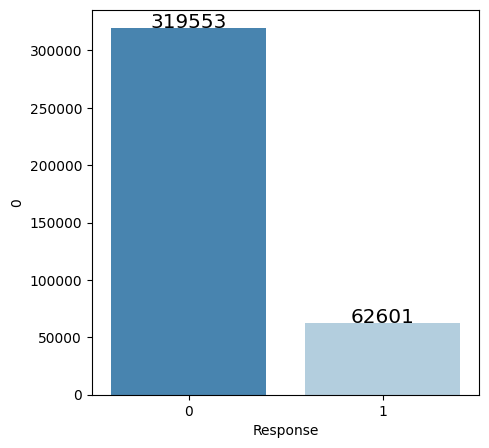

time: 245 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('Response').size().reset_index()
pal = sns.color_palette("Blues", len(target_group))
rank = target_group["Response"].argsort().argsort()
g = sns.barplot(x = target_group['Response'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['Response'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

#**DROPPING COLUMNS/MISSING VALUES**


In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

No. of missing values: 
	id: 0
	Gender: 0
	Age: 0
	Driving_License: 0
	Region_Code: 0
	Previously_Insured: 0
	Vehicle_Age: 0
	Vehicle_Damage: 0
	Annual_Premium: 0
	Policy_Sales_Channel: 0
	Vintage: 0
	Response: 0
time: 47 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


time: 8.6 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
drop_cols = ['id', 'Gender', 'Age']
data = data.drop(drop_cols, axis = 1)

time: 5.53 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
drop_cols = ['Vehicle_Age']
data = data.drop(drop_cols, axis = 1)

time: 6.93 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
data.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,7.0,1,No,2630.0,152.0,16,0
1,1,28.0,0,Yes,43327.0,26.0,135,0
2,1,33.0,0,Yes,35841.0,124.0,253,0
3,1,33.0,0,No,27645.0,152.0,69,0
4,1,46.0,1,No,29023.0,152.0,211,0


time: 14 ms (started: 2024-03-04 05:09:47 +00:00)


#**DUPLICATED DATA**

In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 12234
time: 58.7 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
print('Duplicated rows before discarding = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Duplicated rows after discarding = %d' % (data.shape[0]))

Duplicated rows before discarding = 382154
Duplicated rows after discarding = 369920
time: 79.1 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
data.dtypes

Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

time: 6.79 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
numerical_cols = ['Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
categorical_cols = ['Vehicle_Damage']

time: 1.17 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

   Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0                1          7.0                   1          2630.0   
1                1         28.0                   0         43327.0   
2                1         33.0                   0         35841.0   
3                1         33.0                   0         27645.0   
4                1         46.0                   1         29023.0   

   Policy_Sales_Channel  Vintage  Response  Vehicle_Damage_No  \
0                 152.0       16         0                  1   
1                  26.0      135         0                  0   
2                 124.0      253         0                  0   
3                 152.0       69         0                  1   
4                 152.0      211         0                  1   

   Vehicle_Damage_Yes  
0                   0  
1                   1  
2                   1  
3                   0  
4                   0  
time: 58.7 ms (started: 2024-03-04 05:

In [ ]:
data_encoded.dtypes

Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Vehicle_Damage_No         uint8
Vehicle_Damage_Yes        uint8
dtype: object

time: 3.62 ms (started: 2024-03-04 05:09:47 +00:00)


#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

time: 519 ms (started: 2024-03-04 05:09:47 +00:00)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['Response'])
y = data['Response']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

time: 87.2 ms (started: 2024-03-04 05:09:48 +00:00)


In [ ]:
# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

time: 3.49 s (started: 2024-03-04 05:09:48 +00:00)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

pd.DataFrame(precision_recall)

Accuracy: 0.7965415945790081


,0,1,accuracy,macro avg,weighted avg
precision,0.905772,0.410028,0.796542,0.657900,0.824564
recall,0.844542,0.551515,0.796542,0.698029,0.796542
f1-score,0.874086,0.470362,0.796542,0.672224,0.807952
support,92797.000000,18179.000000,0.796542,110976.000000,110976.000000


time: 1min 39s (started: 2024-03-04 05:09:51 +00:00)


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 216314 samples
Class 1: 216314 samples
time: 2.21 ms (started: 2024-03-04 05:11:31 +00:00)


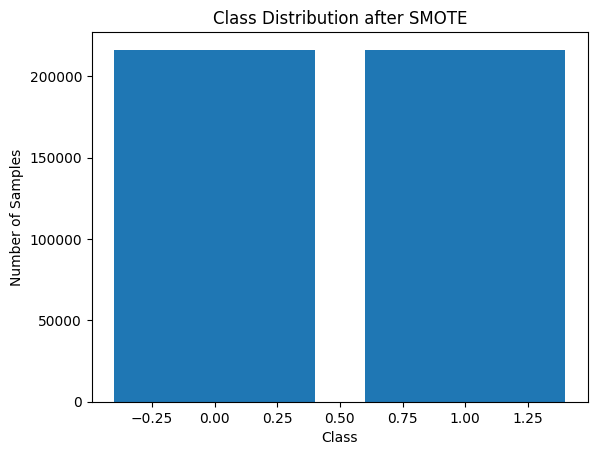

time: 162 ms (started: 2024-03-04 05:11:31 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[78371 14426]
 [ 8153 10026]]
time: 14.9 ms (started: 2024-03-04 05:11:31 +00:00)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report


time: 4.86 ms (started: 2024-03-04 05:11:31 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)


Accuracy: 0.8361898068050749

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     92797
           1       0.00      0.00      0.00     18179

    accuracy                           0.84    110976
   macro avg       0.42      0.50      0.46    110976
weighted avg       0.70      0.84      0.76    110976

time: 29.6 s (started: 2024-03-04 05:11:31 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3033 - accuracy: 0.8348 - val_loss: 0.5930 - val_accuracy: 0.5000
Epoch 2/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3008 - accuracy: 0.8353 - val_loss: 0.6009 - val_accuracy: 0.5000
Epoch 3/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3000 - accuracy: 0.8353 - val_loss: 0.5842 - val_accuracy: 0.5000
Epoch 4/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.2995 - accuracy: 0.8353 - val_loss: 0.5853 - val_accuracy: 0.5054
Epoch 5/10
9248/9248 [==============================] - 16s 2ms/step - loss: 0.2992 - accuracy: 0.8353 - val_loss: 0.5825 - val_accuracy: 0.5011
Epoch 6/10
9248/9248 [==============================] - 18s 2ms/step - loss: 0.2990 - accuracy: 0.8353 - val_loss: 0.6006 - val_accuracy: 0.5000
Epoch 7/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.2988 - accuracy: 0.8353 - val_loss: 0.5994 - val_ac

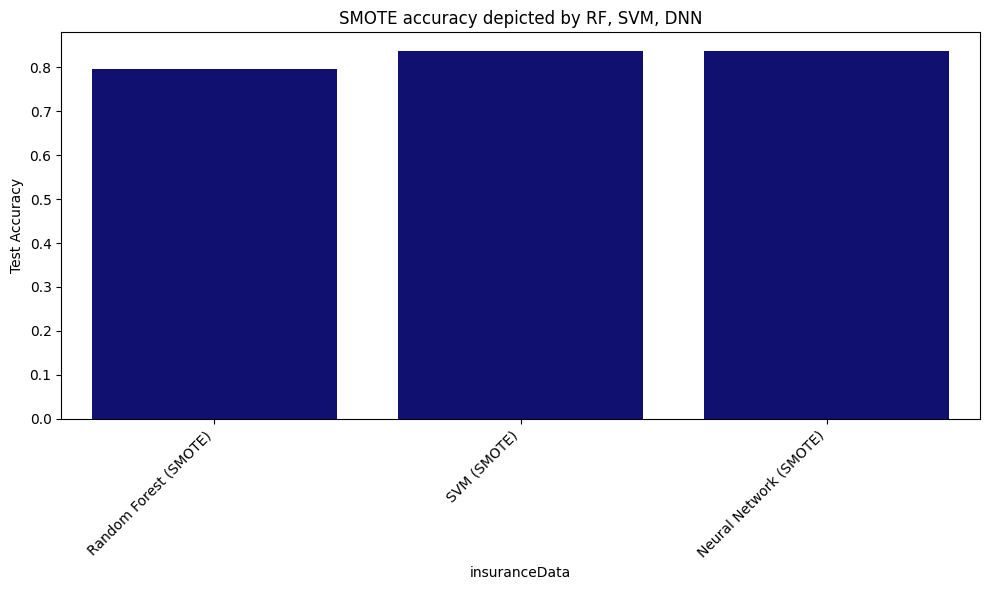

time: 213 ms (started: 2024-03-04 05:15:08 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
data.shape

(369920, 8)

time: 2.21 ms (started: 2024-03-04 05:15:08 +00:00)


#**USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before ADASYN:
0    247210
1     48726
Name: Response, dtype: int64
Class distribution after ADASYN:
0    247210
1    245773
Name: Response, dtype: int64
time: 15.2 s (started: 2024-03-04 05:15:08 +00:00)


In [ ]:
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.7926713884083045


,0,1,accuracy,macro avg,weighted avg
precision,0.909300,0.404818,0.792671,0.657059,0.826909
recall,0.835544,0.573036,0.792671,0.704290,0.792671
f1-score,0.870863,0.474458,0.792671,0.672660,0.806123
support,61901.000000,12083.000000,0.792671,73984.000000,73984.000000


time: 1min 57s (started: 2024-03-04 05:15:24 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.8366809039792388

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     61901
           1       0.00      0.00      0.00     12083

    accuracy                           0.84     73984
   macro avg       0.42      0.50      0.46     73984
weighted avg       0.70      0.84      0.76     73984

time: 36.1 s (started: 2024-03-04 05:17:21 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.3031 - accuracy: 0.8351 - val_loss: 0.6205 - val_accuracy: 0.4991
Epoch 2/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3008 - accuracy: 0.8354 - val_loss: 0.6234 - val_accuracy: 0.4991
Epoch 3/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.3002 - accuracy: 0.8353 - val_loss: 0.6135 - val_accuracy: 0.4991
Epoch 4/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.2998 - accuracy: 0.8353 - val_loss: 0.6364 - val_accuracy: 0.4991
Epoch 5/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.2995 - accuracy: 0.8353 - val_loss: 0.6159 - val_accuracy: 0.4991
Epoch 6/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.2993 - accuracy: 0.8353 - val_loss: 0.6051 - val_accuracy: 0.4991
Epoch 7/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.2991 - accuracy: 0.8353 - val_loss: 0.5938 - val_ac

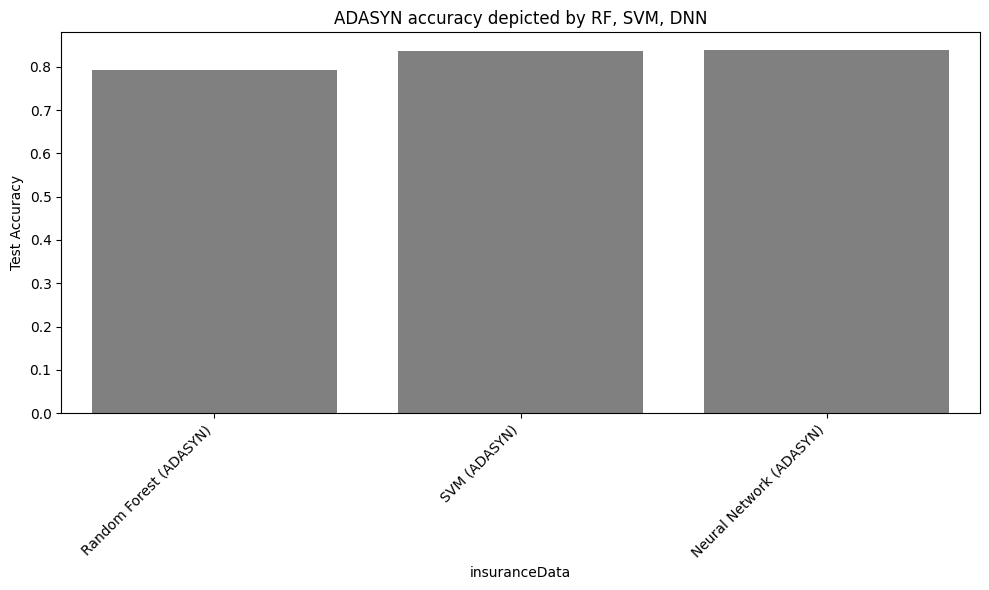

time: 209 ms (started: 2024-03-04 05:20:17 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='grey')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    247210
1    247210
Name: Response, dtype: int64
time: 51.9 ms (started: 2024-03-04 05:20:18 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rof = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rof)

pd.DataFrame(precision_recall)

Accuracy: 0.8020112456747405


,0,1,accuracy,macro avg,weighted avg
precision,0.891607,0.403271,0.802011,0.647439,0.812255
recall,0.869275,0.455332,0.802011,0.662303,0.802011
f1-score,0.880299,0.427723,0.802011,0.654011,0.806758
support,30981.000000,6011.000000,0.802011,36992.000000,36992.000000


time: 1min 3s (started: 2024-03-04 05:20:18 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rof = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rof)
print("\nClassification Report:\n", report)

Accuracy: 0.7028276384083045

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79     30981
           1       0.35      0.98      0.52      6011

    accuracy                           0.70     36992
   macro avg       0.67      0.82      0.65     36992
weighted avg       0.89      0.70      0.74     36992

time: 1min 33s (started: 2024-03-04 05:21:21 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rof = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3030 - accuracy: 0.8348 - val_loss: 0.6290 - val_accuracy: 0.5000
Epoch 2/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.3004 - accuracy: 0.8353 - val_loss: 0.5966 - val_accuracy: 0.5004
Epoch 3/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.3000 - accuracy: 0.8353 - val_loss: 0.5988 - val_accuracy: 0.5000
Epoch 4/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.2997 - accuracy: 0.8354 - val_loss: 0.6075 - val_accuracy: 0.5002
Epoch 5/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.2993 - accuracy: 0.8353 - val_loss: 0.6064 - val_accuracy: 0.5000
Epoch 6/10
9248/9248 [==============================] - 12s 1ms/step - loss: 0.2991 - accuracy: 0.8353 - val_loss: 0.5977 - val_accuracy: 0.5001
Epoch 7/10
9248/9248 [==============================] - 13s 1ms/step - loss: 0.2989 - accuracy: 0.8353 - val_loss: 0.6053 - val_ac

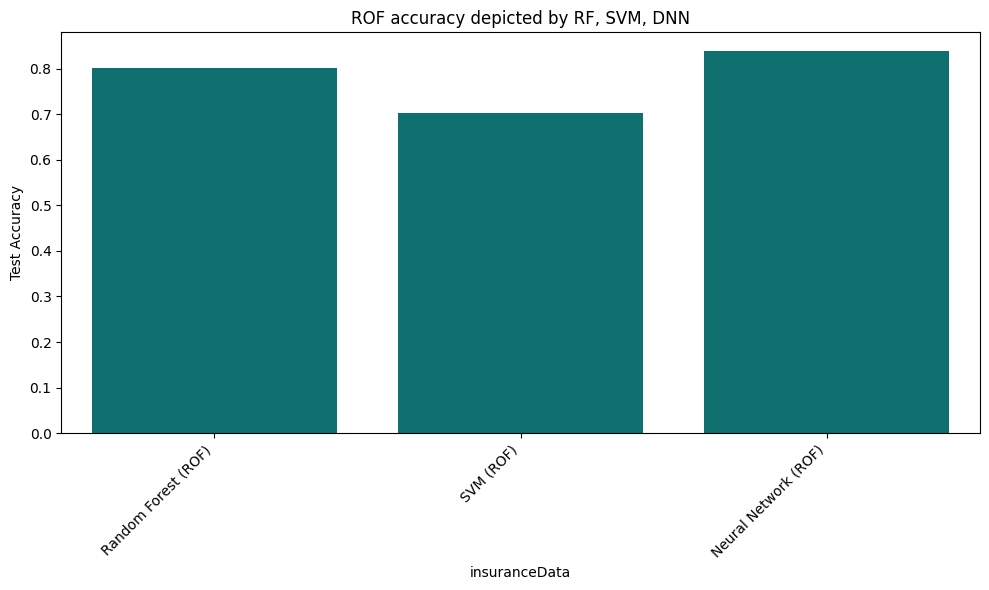

time: 219 ms (started: 2024-03-04 05:25:21 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_rof,
    'SVM (ROF)': accuracy_svm_rof,
    'Neural Network (ROF)': accuracy_dnn_rof,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    48726
1    48726
Name: Response, dtype: int64
time: 58 ms (started: 2024-03-04 05:25:21 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ruf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ruf)

pd.DataFrame(precision_recall)

Accuracy: 0.7583261245674741


,0,1,accuracy,macro avg,weighted avg
precision,0.963962,0.389380,0.758326,0.676671,0.870596
recall,0.739066,0.857594,0.758326,0.798330,0.758326
f1-score,0.836665,0.535584,0.758326,0.686125,0.787741
support,30981.000000,6011.000000,0.758326,36992.000000,36992.000000


time: 11.9 s (started: 2024-03-04 05:25:21 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ruf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ruf)
print("\nClassification Report:\n", report)

Accuracy: 0.7028276384083045

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79     30981
           1       0.35      0.98      0.52      6011

    accuracy                           0.70     36992
   macro avg       0.67      0.82      0.65     36992
weighted avg       0.89      0.70      0.74     36992

time: 7.49 s (started: 2024-03-04 05:25:33 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ruf = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
9248/9248 [==============================] - 11s 1ms/step - loss: 0.3032 - accuracy: 0.8349 - val_loss: 0.6008 - val_accuracy: 0.5000
Epoch 2/10
9248/9248 [==============================] - 11s 1ms/step - loss: 0.3009 - accuracy: 0.8353 - val_loss: 0.6070 - val_accuracy: 0.5002
Epoch 3/10
9248/9248 [==============================] - 10s 1ms/step - loss: 0.3004 - accuracy: 0.8354 - val_loss: 0.6045 - val_accuracy: 0.5002
Epoch 4/10
9248/9248 [==============================] - 10s 1ms/step - loss: 0.3002 - accuracy: 0.8353 - val_loss: 0.6211 - val_accuracy: 0.5000
Epoch 5/10
9248/9248 [==============================] - 11s 1ms/step - loss: 0.2999 - accuracy: 0.8353 - val_loss: 0.5948 - val_accuracy: 0.5000
Epoch 6/10
9248/9248 [==============================] - 11s 1ms/step - loss: 0.2997 - accuracy: 0.8353 - val_loss: 0.6011 - val_accuracy: 0.5000
Epoch 7/10
9248/9248 [==============================] - 11s 1ms/step - loss: 0.2995 - accuracy: 0.8354 - val_loss: 0.6017 - val_ac

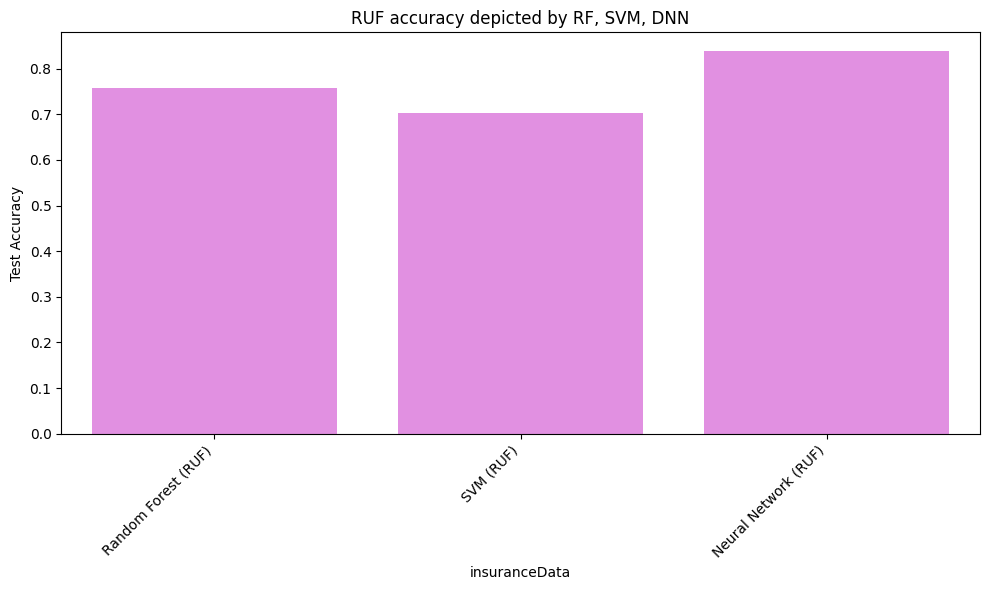

time: 477 ms (started: 2024-03-04 05:27:29 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_ruf,
    'SVM (RUF)': accuracy_svm_ruf,
    'Neural Network (RUF)': accuracy_dnn_ruf,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'violet')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING GAMMA DISTRIBUTION (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
1.0    60809
0.0    60809
dtype: int64
time: 28.4 ms (started: 2024-03-04 05:27:30 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.2015300605536332


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.169095,0.20153,0.584548,0.864982
recall,0.046609,1.000000,0.20153,0.523305,0.201530
f1-score,0.089067,0.289275,0.20153,0.189171,0.121600
support,30981.000000,6011.000000,0.20153,36992.000000,36992.000000


time: 4.13 s (started: 2024-03-04 05:27:30 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.7182363754325259

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     30981
           1       0.34      0.77      0.47      6011

    accuracy                           0.72     36992
   macro avg       0.64      0.74      0.64     36992
weighted avg       0.84      0.72      0.75     36992

time: 15 s (started: 2024-03-04 05:27:34 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0631 - accuracy: 0.9847 - val_loss: 7.1909 - val_accuracy: 0.6814
Epoch 2/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 10.9367 - val_accuracy: 0.5924
Epoch 3/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 13.0529 - val_accuracy: 0.5834
Epoch 4/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 15.3646 - val_accuracy: 0.5768
Epoch 5/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 16.4264 - val_accuracy: 0.5823
Epoch 6/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 16.0336 - val_accuracy: 0.6016
Epoch 7/10
3041/3041 [==============================] - 4s 1ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 18.6380 - val_acc

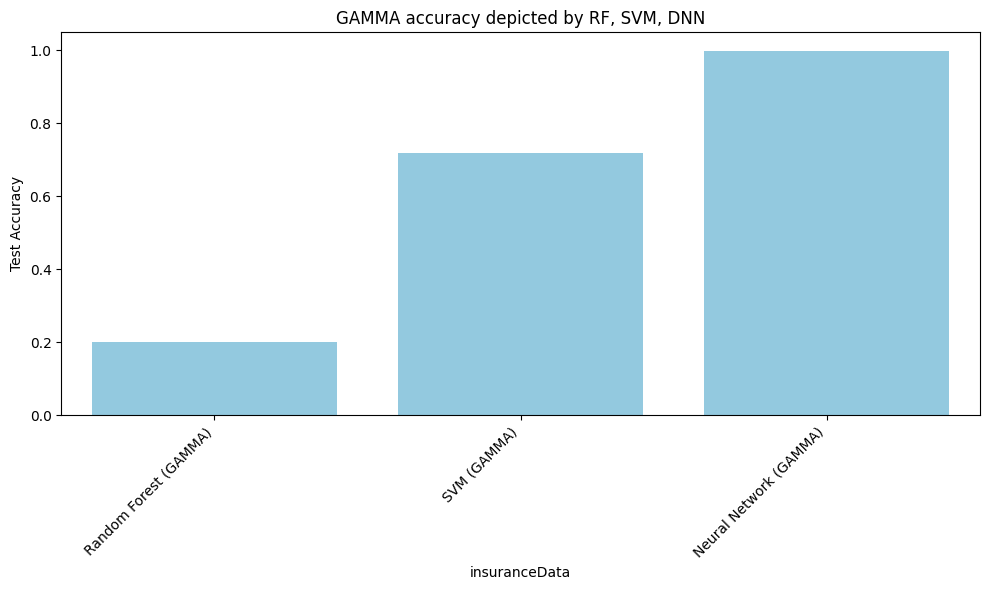

time: 202 ms (started: 2024-03-04 05:28:29 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color = 'skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

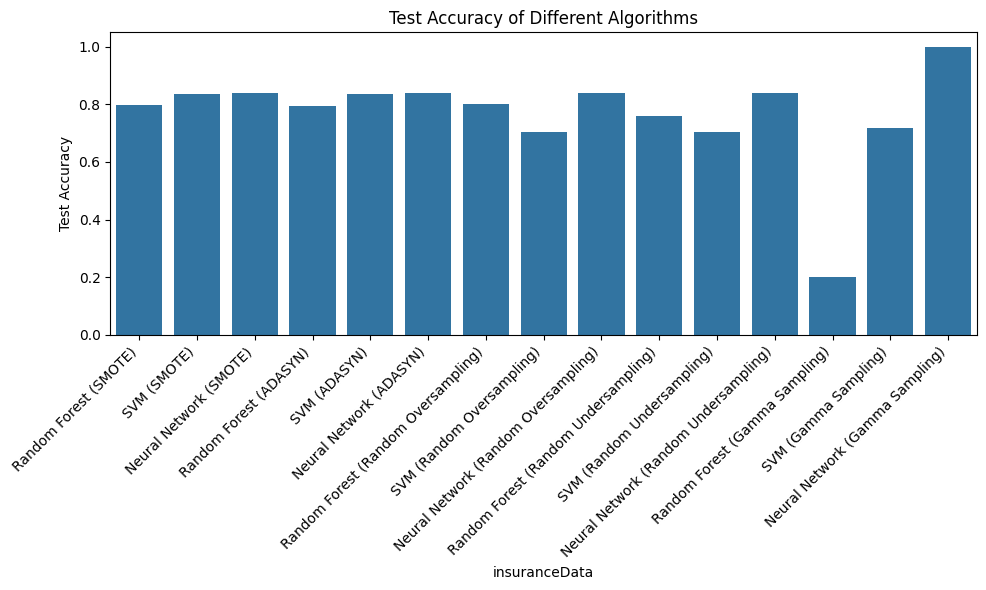

time: 297 ms (started: 2024-03-04 05:28:29 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_rof,
    'SVM (Random Oversampling)': accuracy_svm_rof,
    'Neural Network (Random Oversampling)': accuracy_dnn_rof,
    'Random Forest (Random Undersampling)': accuracy_rf_ruf,
    'SVM (Random Undersampling)': accuracy_svm_ruf,
    'Neural Network (Random Undersampling)': accuracy_dnn_ruf,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('insuranceData')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_rof + accuracy_rf_rof + accuracy_dnn_rof)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_ruf + accuracy_rf_ruf + accuracy_dnn_ruf)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

SMOTE avg :  82.34122671882999
adasyn avg :  82.23219384646609
ros avg :  78.0799448558891
rus avg :  76.62197210521984
gamma avg :  63.970287970880605
time: 1.18 ms (started: 2024-03-04 05:28:29 +00:00)
